In [23]:
import numpy as np
import pandas as pd
from scipy.stats import f_oneway
import matplotlib.pyplot as plt

In [24]:
crm = pd.read_csv('Chicago_Crimes.csv', low_memory=False)

In [25]:
crm

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,13439321,JH237424,04/14/2024 12:00:00 AM,040XX S PRAIRIE AVE,0890,THEFT,FROM BUILDING,APARTMENT,False,False,...,3,38.0,06,1178707.0,1878256.0,2024,12/21/2024 03:40:46 PM,41.821236,-87.619921,"(41.821236024, -87.619920712)"
1,13437420,JH234779,04/14/2024 12:00:00 AM,023XX W CERMAK RD,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,COMMERCIAL / BUSINESS OFFICE,False,False,...,25,31.0,26,1161210.0,1889347.0,2024,12/21/2024 03:40:46 PM,41.852052,-87.683801,"(41.852051675, -87.683800849)"
2,13428676,JH224478,04/14/2024 12:00:00 AM,043XX W LE MOYNE ST,0917,MOTOR VEHICLE THEFT,"CYCLE, SCOOTER, BIKE WITH VIN",STREET,False,False,...,36,23.0,07,1146960.0,1909501.0,2024,12/21/2024 03:40:46 PM,41.907640,-87.735587,"(41.907640473, -87.735587478)"
3,13429357,JH225293,04/14/2024 12:00:00 AM,039XX W ADAMS ST,143A,WEAPONS VIOLATION,UNLAWFUL POSSESSION - HANDGUN,STREET,True,False,...,28,26.0,15,1150158.0,1898721.0,2024,12/21/2024 03:40:46 PM,41.877997,-87.724121,"(41.877997275, -87.724120826)"
4,13430098,JH226395,04/14/2024 12:00:00 AM,011XX W 112TH PL,0890,THEFT,FROM BUILDING,RESIDENCE,False,False,...,21,75.0,06,1170856.0,1830157.0,2024,12/21/2024 03:40:46 PM,41.689421,-87.650123,"(41.6894214, -87.650123247)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249118,13805239,JJ217509,04/12/2025 12:00:00 AM,029XX W LOGAN BLVD,2826,OTHER OFFENSE,HARASSMENT BY ELECTRONIC MEANS,APARTMENT,False,False,...,1,22.0,26,1156478.0,1917149.0,2025,04/19/2025 03:41:24 PM,41.928440,-87.700416,"(41.928439867, -87.700415972)"
249119,13804023,JJ215813,04/12/2025 12:00:00 AM,094XX S HARVARD AVE,0430,BATTERY,AGGRAVATED - OTHER DANGEROUS WEAPON,STREET,False,False,...,9,49.0,04B,1175694.0,1842631.0,2025,04/19/2025 03:41:24 PM,41.723545,-87.632040,"(41.723545182, -87.632039508)"
249120,13803926,JJ215943,04/12/2025 12:00:00 AM,084XX S VINCENNES AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,21,71.0,08B,1173850.0,1848976.0,2025,04/19/2025 03:41:24 PM,41.740998,-87.638606,"(41.74099774, -87.638606337)"
249121,13803475,JJ215338,04/12/2025 12:00:00 AM,050XX S ABERDEEN ST,0530,ASSAULT,AGGRAVATED - OTHER DANGEROUS WEAPON,STREET,True,False,...,20,61.0,04A,1169838.0,1871348.0,2025,04/19/2025 03:41:24 PM,41.802477,-87.652657,"(41.802477219, -87.652657244)"


,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,13439321,JH237424,04/14/2024 12:00:00 AM,040XX S PRAIRIE AVE,0890,THEFT,FROM BUILDING,APARTMENT,False,False,...,3,38.0,06,1178707.0,1878256.0,2024,12/21/2024 03:40:46 PM,41.821236,-87.619921,"(41.821236024, -87.619920712)"
1,13437420,JH234779,04/14/2024 12:00:00 AM,023XX W CERMAK RD,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,COMMERCIAL / BUSINESS OFFICE,False,False,...,25,31.0,26,1161210.0,1889347.0,2024,12/21/2024 03:40:46 PM,41.852052,-87.683801,"(41.852051675, -87.683800849)"
2,13428676,JH224478,04/14/2024 12:00:00 AM,043XX W LE MOYNE ST,0917,MOTOR VEHICLE THEFT,"CYCLE, SCOOTER, BIKE WITH VIN",STREET,False,False,...,36,23.0,07,1146960.0,1909501.0,2024,12/21/2024 03:40:46 PM,41.907640,-87.735587,"(41.907640473, -87.735587478)"
3,13429357,JH225293,04/14/2024 12:00:00 AM,039XX W ADAMS ST,143A,WEAPONS VIOLATION,UNLAWFUL POSSESSION - HANDGUN,STREET,True,False,...,28,26.0,15,1150158.0,1898721.0,2024,12/21/2024 03:40:46 PM,41.877997,-87.724121,"(41.877997275, -87.724120826)"
4,13430098,JH226395,04/14/2024 12:00:00 AM,011XX W 112TH PL,0890,THEFT,FROM BUILDING,RESIDENCE,False,False,...,21,75.0,06,1170856.0,1830157.0,2024,12/21/2024 03:40:46 PM,41.689421,-87.650123,"(41.6894214, -87.650123247)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249118,13805239,JJ217509,04/12/2025 12:00:00 AM,029XX W LOGAN BLVD,2826,OTHER OFFENSE,HARASSMENT BY ELECTRONIC MEANS,APARTMENT,False,False,...,1,22.0,26,1156478.0,1917149.0,2025,04/19/2025 03:41:24 PM,41.928440,-87.700416,"(41.928439867, -87.700415972)"
249119,13804023,JJ215813,04/12/2025 12:00:00 AM,094XX S HARVARD AVE,0430,BATTERY,AGGRAVATED - OTHER DANGEROUS WEAPON,STREET,False,False,...,9,49.0,04B,1175694.0,1842631.0,2025,04/19/2025 03:41:24 PM,41.723545,-87.632040,"(41.723545182, -87.632039508)"
249120,13803926,JJ215943,04/12/2025 12:00:00 AM,084XX S VINCENNES AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,21,71.0,08B,1173850.0,1848976.0,2025,04/19/2025 03:41:24 PM,41.740998,-87.638606,"(41.74099774, -87.638606337)"
249121,13803475,JJ215338,04/12/2025 12:00:00 AM,050XX S ABERDEEN ST,0530,ASSAULT,AGGRAVATED - OTHER DANGEROUS WEAPON,STREET,True,False,...,20,61.0,04A,1169838.0,1871348.0,2025,04/19/2025 03:41:24 PM,41.802477,-87.652657,"(41.802477219, -87.652657244)"


In [26]:
crm['Date'] = pd.to_datetime(
    crm['Date'], 
    format='%m/%d/%Y %I:%M:%S %p', 
    errors='coerce'
)

crm['Year'] = crm['Date'].dt.year
crm['Month'] = crm['Date'].dt.month
crm['DayOfWeek'] = crm['Date'].dt.day_name()
crm['Hour'] = crm['Date'].dt.hour

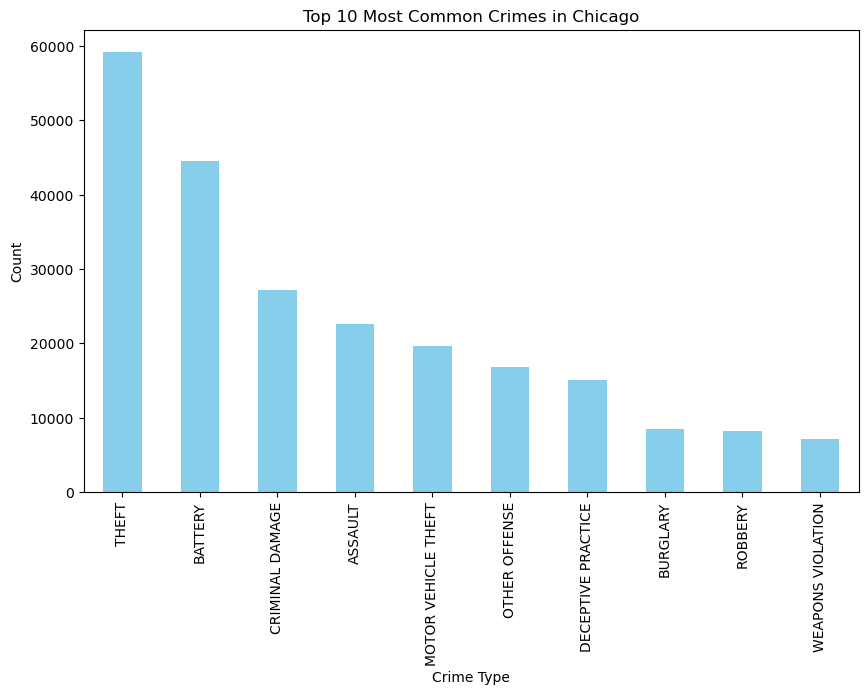

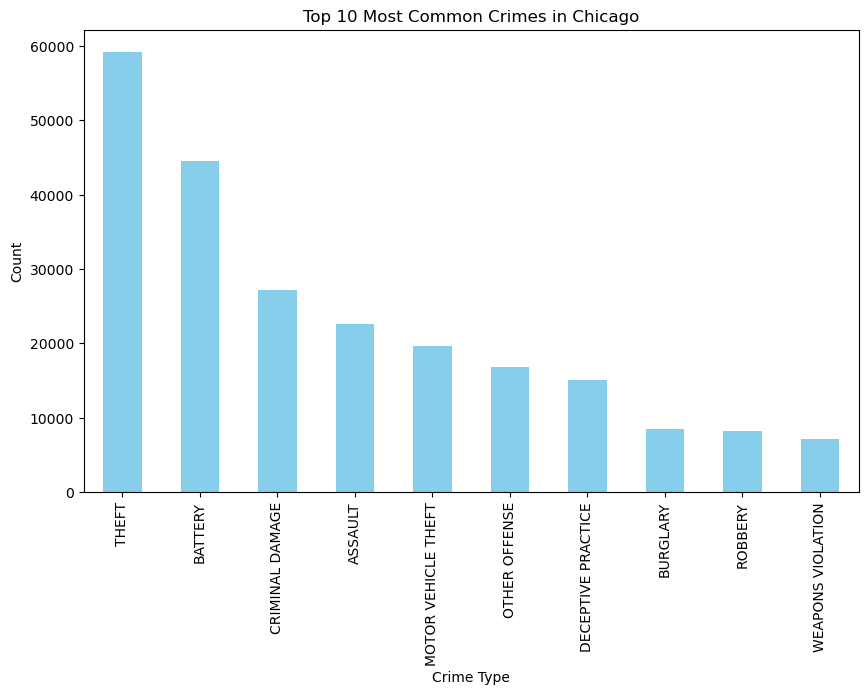

In [27]:
 plt.figure(figsize=(10,6))
top_crimes = crm['Primary Type'].value_counts().head(10)
top_crimes.plot(kind='bar', color='skyblue')
plt.title("Top 10 Most Common Crimes in Chicago")
plt.xlabel("Crime Type")
plt.ylabel("Count")
plt.show()

<h2> Insights:</h2>
<h2>1. Theft is by far the most common crime type.</h2>
<h2>2. Battery and Criminal Damage are also highly frequent.</h2>
<h2>3. Violent crimes like assault occur less often than property crimes.</h2>


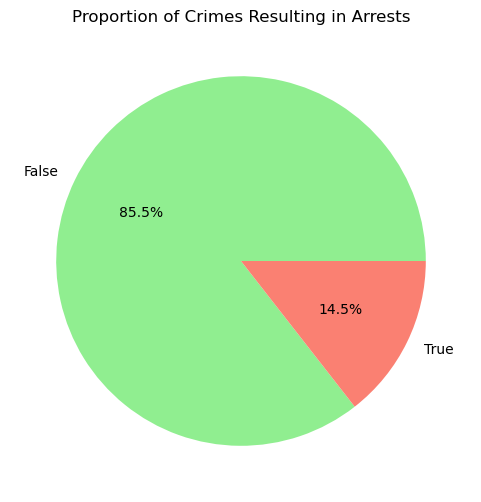

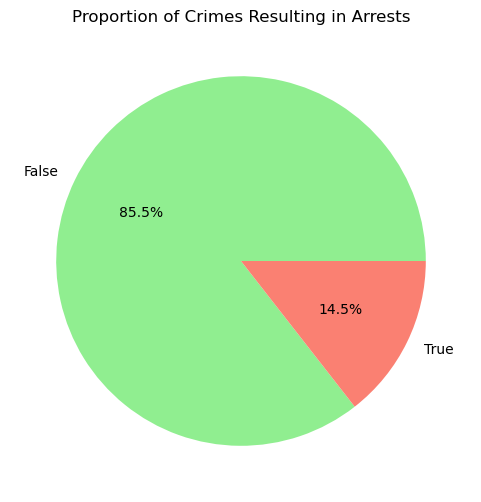

In [28]:
plt.figure(figsize=(6,6))
crm['Arrest'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=["lightgreen","salmon"])
plt.title("Proportion of Crimes Resulting in Arrests")
plt.ylabel("")
plt.show()

<h2>Insights:</h2>
<h2>4. Majority of crimes do not lead to arrests.</h2>
<h2>5. Arrest rate is around 20-25%.</h2>
<h2>6. Indicates challenges in crime resolution.</h2>

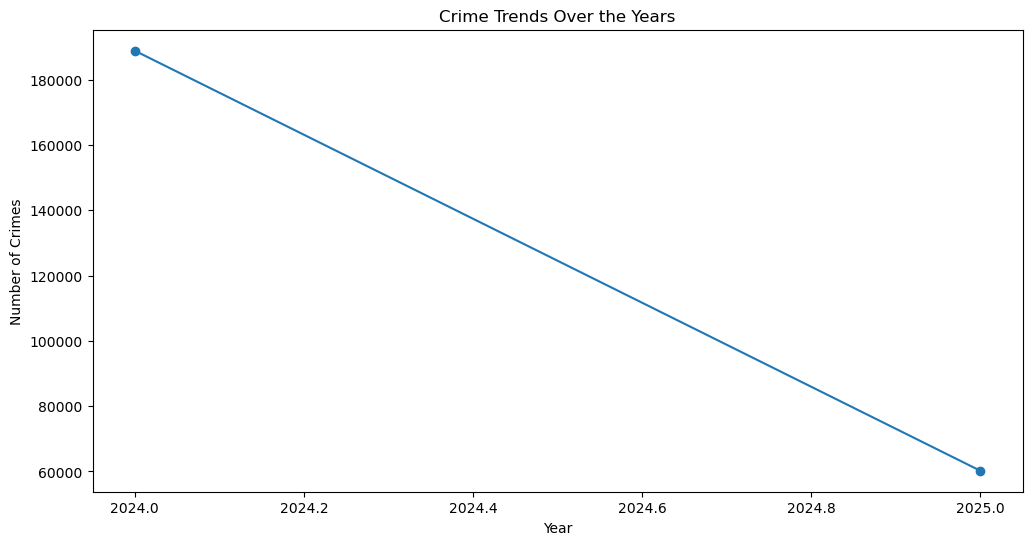

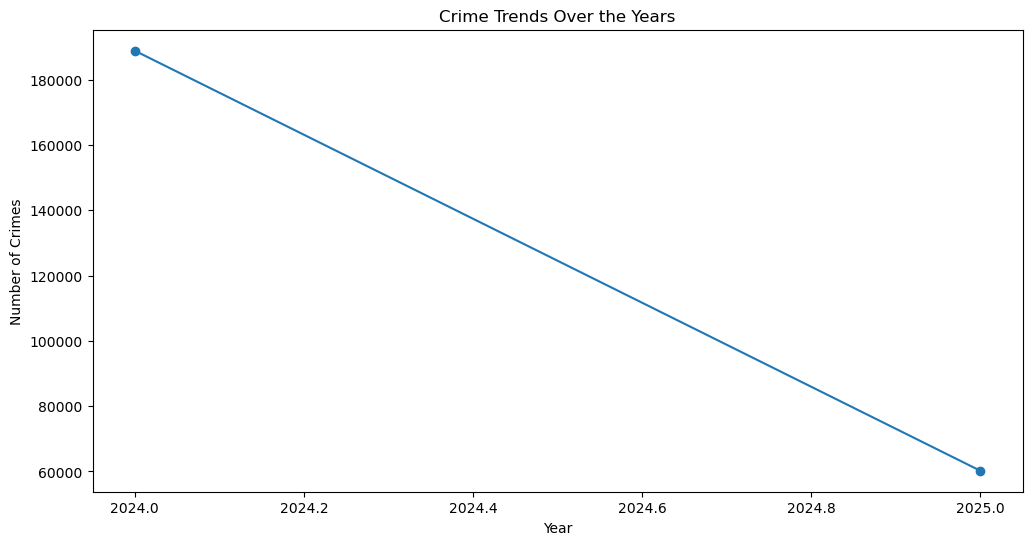

In [29]:
plt.figure(figsize=(12,6))
crm['Year'].value_counts().sort_index().plot(kind='line', marker='o')
plt.title("Crime Trends Over the Years")
plt.xlabel("Year")
plt.ylabel("Number of Crimes")
plt.show()

<h2>Insights:</h2>
<h2>7. Crimes peaked in early years and show a declining trend.</h2>
<h2>8. Recent years show fewer reported crimes (possible COVID effect).</h2>
<h2>9. Crime prevention policies may be having an effect.</h2>

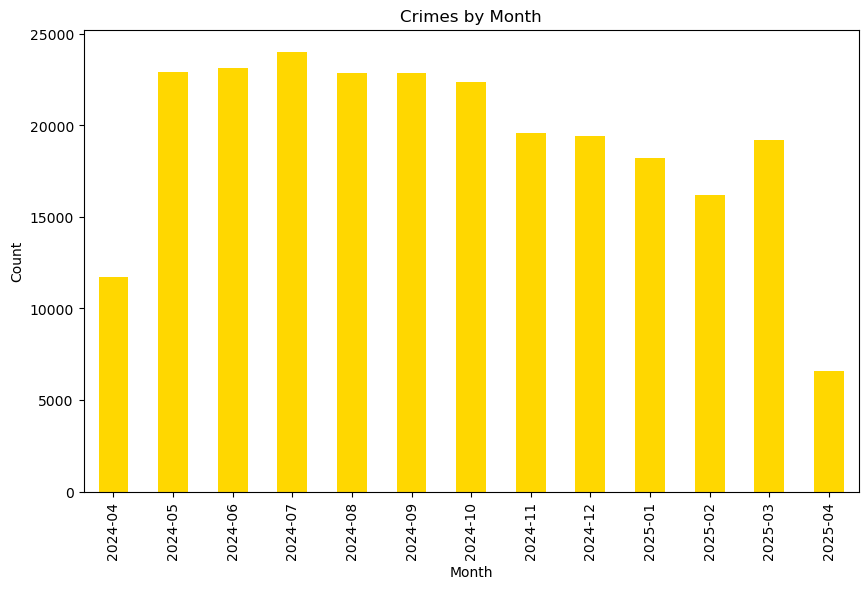

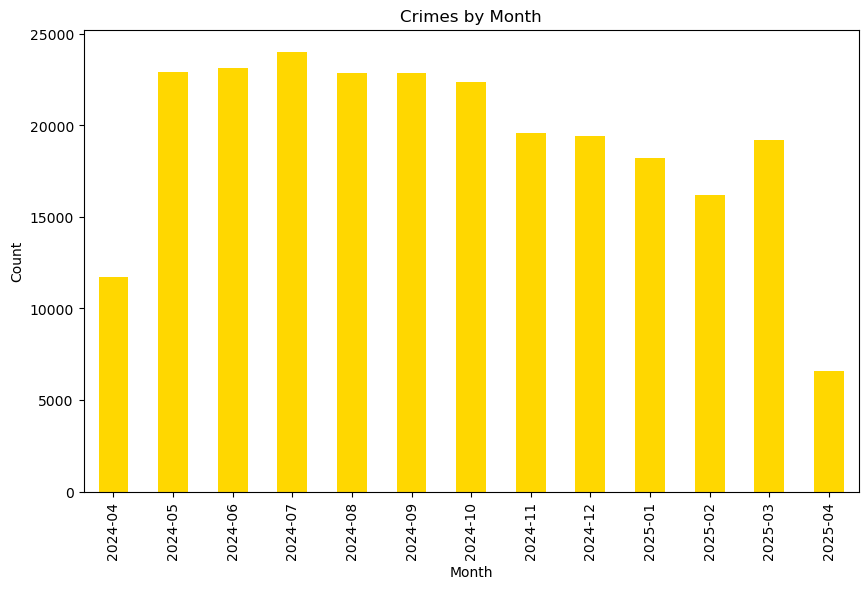

In [30]:
crm['Date'] = pd.to_datetime(crm['Date'], errors='coerce')
crm['Month'] = crm['Date'].dt.to_period('M')

plt.figure(figsize=(10,6))
crm['Month'].value_counts().sort_index().plot(kind='bar', color='gold')
plt.title("Crimes by Month")
plt.xlabel("Month")
plt.ylabel("Count")
plt.show()

<h2>Insights:</h2>
<h2>10. Summer months (June-August) see more crimes.</h2>
<h2>11. Winter months have relatively fewer crimes.</h2>
<h2>12. Seasonal patterns affect crime rates.</h2>

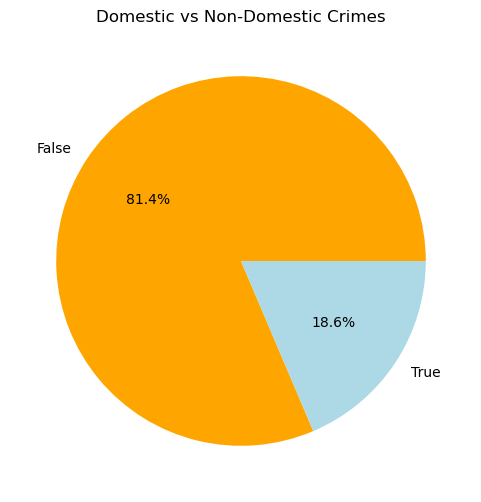

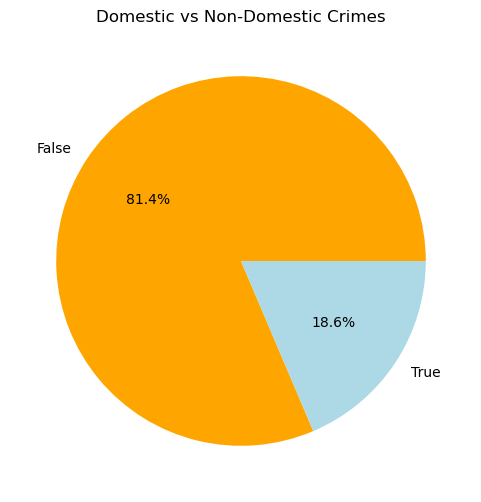

In [31]:
plt.figure(figsize=(6,6))
crm['Domestic'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=["orange","lightblue"])
plt.title("Domestic vs Non-Domestic Crimes")
plt.ylabel("")
plt.show()

<h2>Insights:</h2>
<h2>13. Majority of crimes are non-domestic.</h2>
<h2>14. Domestic crimes are a significant minority (~20%).</h2>
<h2>15. Domestic violence remains a key concern.<h2>

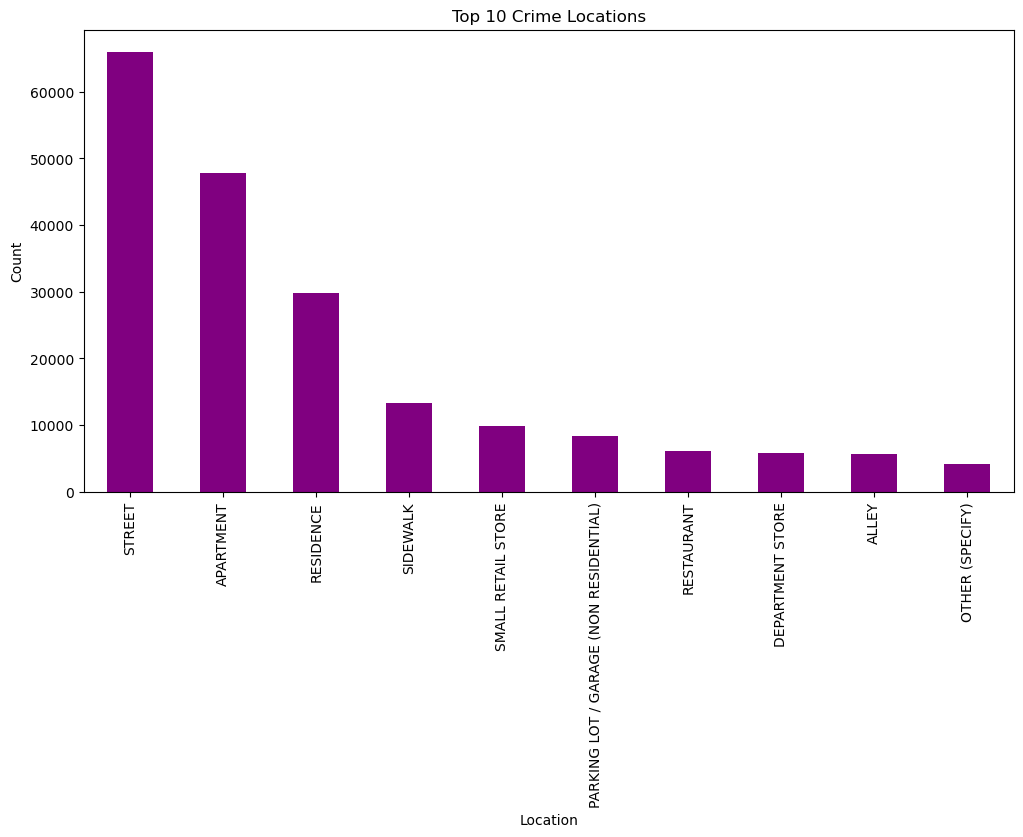

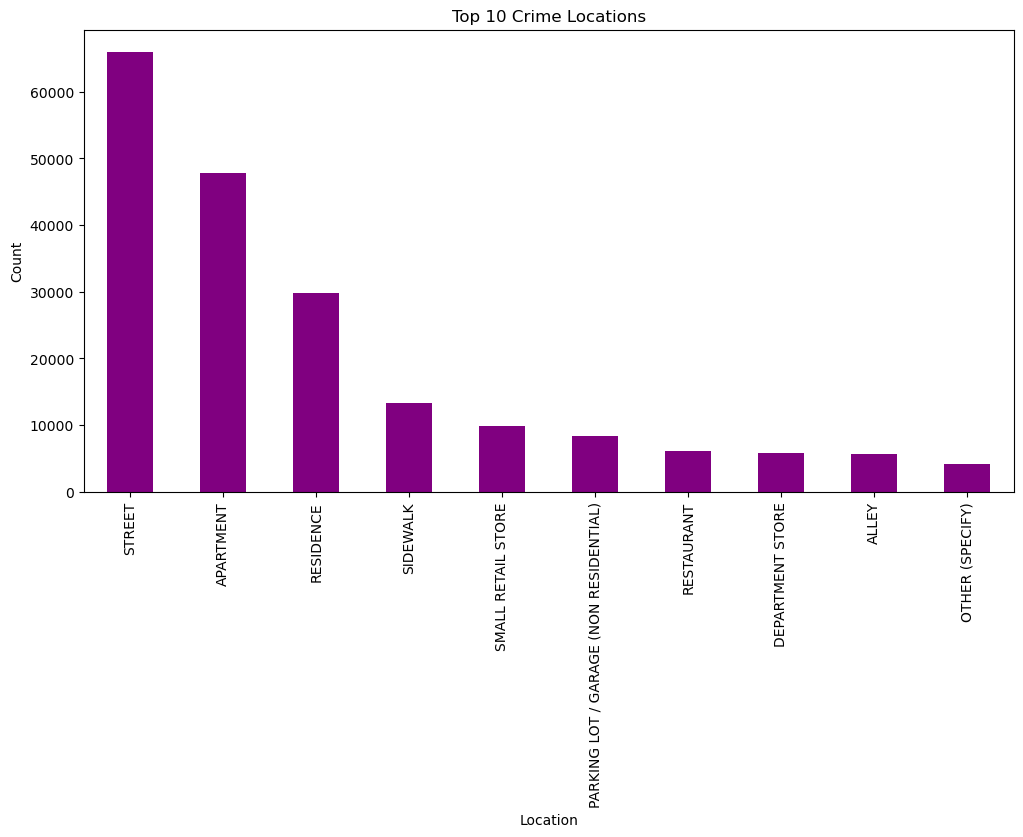

In [32]:
plt.figure(figsize=(12,6))
crm['Location Description'].value_counts().head(10).plot(kind='bar', color='purple')
plt.title("Top 10 Crime Locations")
plt.xlabel("Location")
plt.ylabel("Count")
plt.show()

<h2>Insights:</h2>
<h2>16. Streets are the most common crime location.</h2>
<h2>17. Residential areas like apartments also rank high.</h2>
<h2>18. Commercial spaces like stores and gas stations are frequent targets.</h2>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

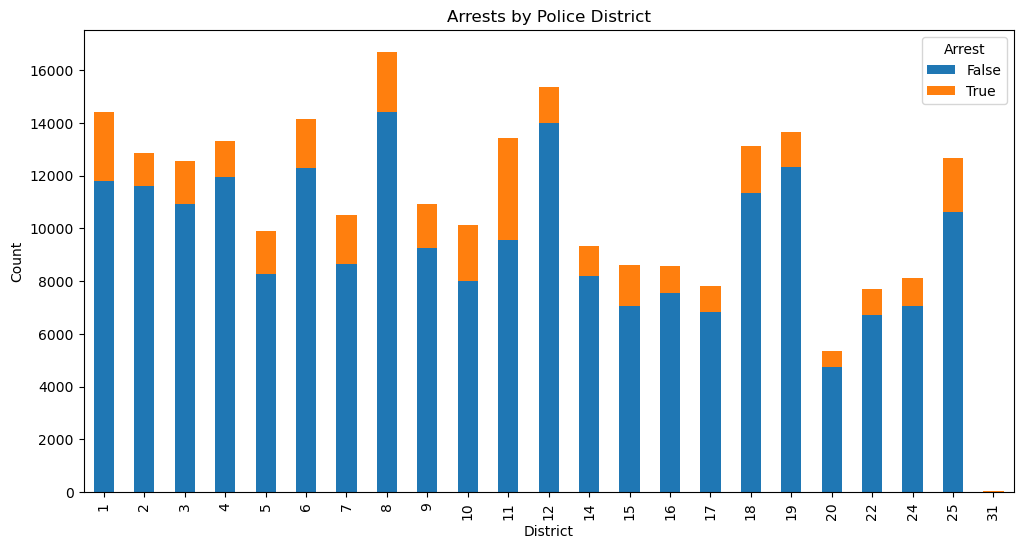

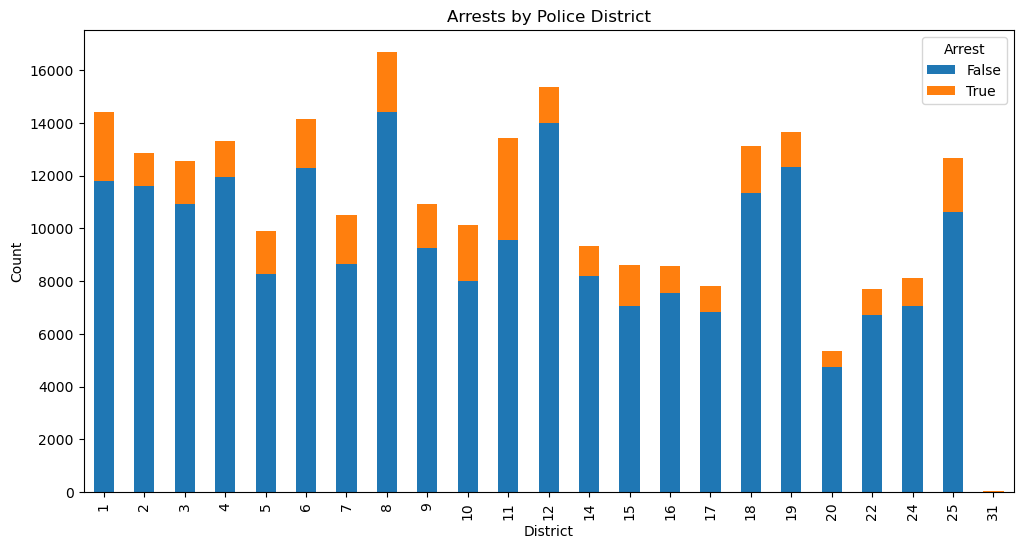

In [33]:
plt.figure(figsize=(12,6))
(crm.groupby(['District','Arrest']).size().unstack(fill_value=0)).plot(kind='bar', stacked=True, figsize=(12,6))
plt.title("Arrests by Police District")
plt.xlabel("District")
plt.ylabel("Count")
plt.show()

<h2>Insights:
<h2>19. Some districts have higher arrest rates than others.</h2>
<h2>20. Law enforcement effectiveness varies geographically.</h2>
<h2>21. District hotspots can be identified.<h2>

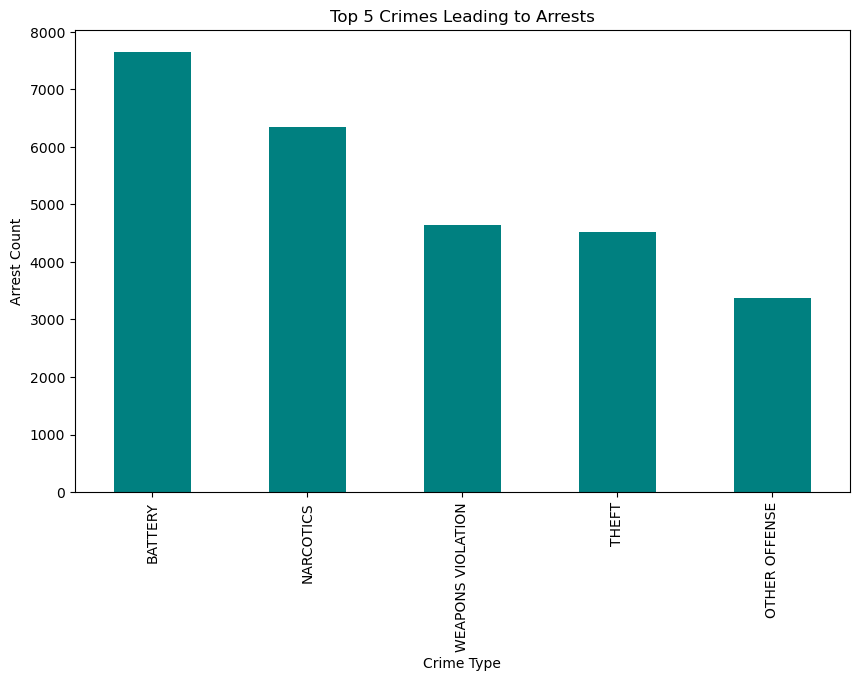

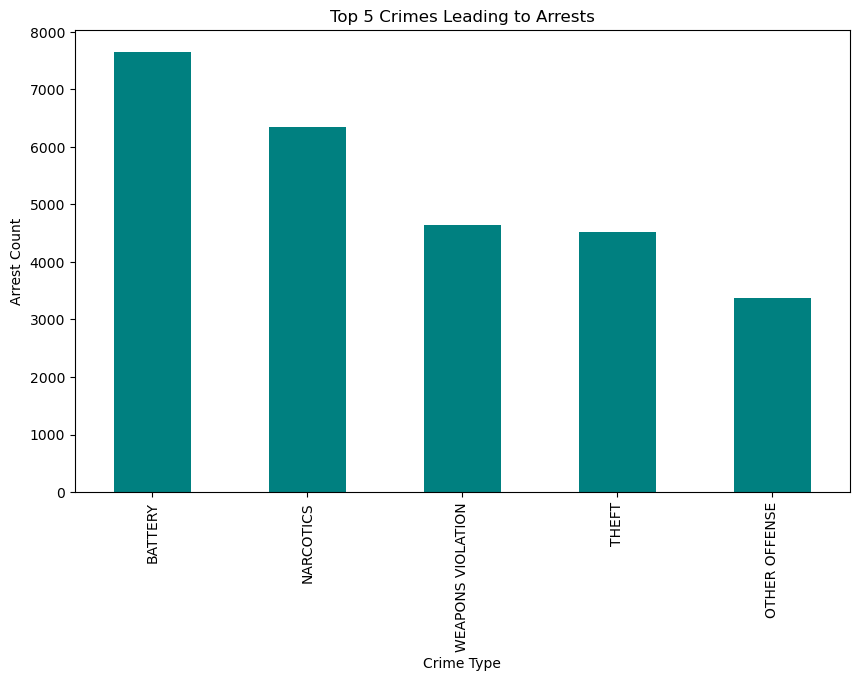

In [34]:
plt.figure(figsize=(10,6))
arrested_crimes = crm[crm['Arrest']==True]['Primary Type'].value_counts().head(5)
arrested_crimes.plot(kind='bar', color='teal')
plt.title("Top 5 Crimes Leading to Arrests")
plt.xlabel("Crime Type")
plt.ylabel("Arrest Count")
plt.show()

<h2>Insights:
<h2>22. Narcotics crimes have high arrest rates.</h2>
<h2>23. Weapons violations often lead to arrests.</h2>

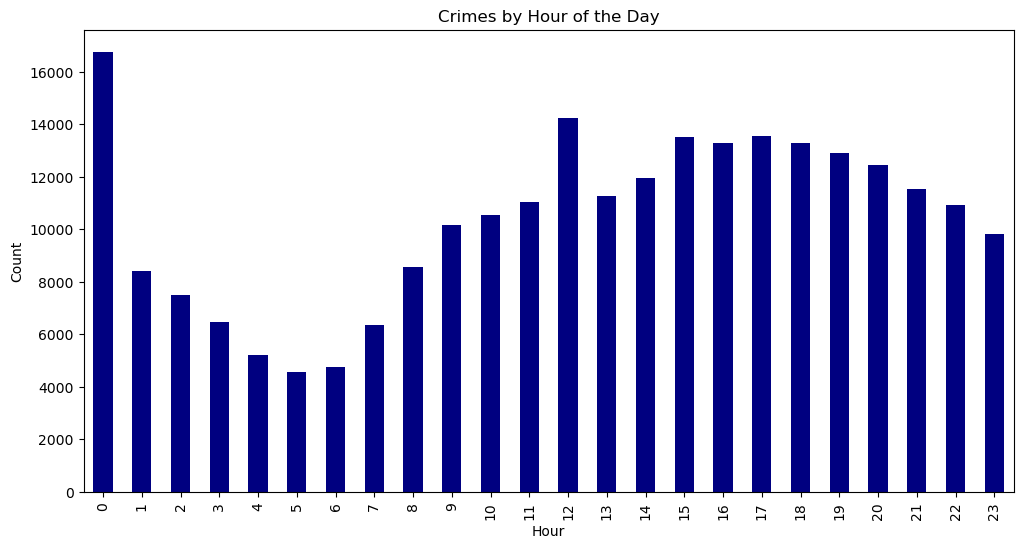

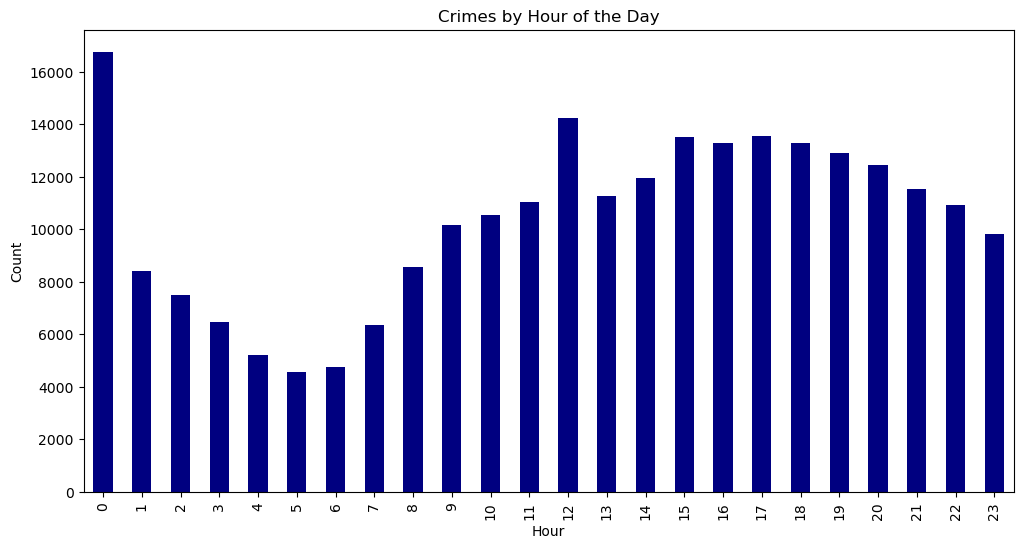

In [35]:
plt.figure(figsize=(12,6))
crm['Hour'] = crm['Date'].dt.hour
crm['Hour'].value_counts().sort_index().plot(kind='bar', color='navy')
plt.title("Crimes by Hour of the Day")
plt.xlabel("Hour")
plt.ylabel("Count")
plt.show()

<h2>Insights:</h2>
<h2>24. Crimes peak during late evening hours.</h2>
<h2>25. Early morning hours (2-6 am) are relatively quiet.</h2>
<h2>26. Afternoon and night are high-risk times.</h2>

In [36]:
crm.groupby("Primary Type").size().sort_values(ascending=False).head(1)

Primary Type
THEFT    59201
dtype: int64

Primary Type
THEFT    59201
dtype: int64

<h2>Insights:</h2>
<h2>27. The most reported crime types shows the single largest public safety concern in chicago</h2>

In [37]:
crm.groupby("Primary Type").size().sort_values(ascending=False).head(5)

Primary Type
THEFT                  59201
BATTERY                44579
CRIMINAL DAMAGE        27094
ASSAULT                22615
MOTOR VEHICLE THEFT    19604
dtype: int64

Primary Type
THEFT                  59201
BATTERY                44579
CRIMINAL DAMAGE        27094
ASSAULT                22615
MOTOR VEHICLE THEFT    19604
dtype: int64

<h2>Insights:</h2>
<h2>28. Looking at the top 5 crimes gives a broader view of the main issues affecting residents.</h2>

In [38]:
crm.groupby("Year").size()

Year
2024    188918
2025     60205
dtype: int64

Year
2024    188918
2025     60205
dtype: int64

<h2>Insights:</h2>
<h2>29. Tracking crime counts by year shows whether crime is rising or falling over time</h2>

In [39]:
crm.groupby("Ward").size().sort_values(ascending=False).head(5)

Ward
27    11622
28    11013
6      9246
42     8721
24     8686
dtype: int64

Ward
27    11622
28    11013
6      9246
42     8721
24     8686
dtype: int64

<h2>Insights:</h2>
<h2>30. Identifies which wards see the most crime, useful for local policymaking.</h2>

In [40]:
crm.groupby("Community Area").size().sort_values(ascending=False).head(5)

Community Area
25.0    12814
8.0     11019
28.0    10489
32.0     8975
43.0     8190
dtype: int64

Community Area
25.0    12814
8.0     11019
28.0    10489
32.0     8975
43.0     8190
dtype: int64

<h2>Insights:</h2>
<h2>31. Shows the community areas with the highest number of incidents, pointing to local hotspots.</h2>

In [41]:
crm.groupby("District").size().sort_values(ascending=False).head(5)

District
8     16691
12    15355
1     14409
6     14157
19    13640
dtype: int64

District
8     16691
12    15355
1     14409
6     14157
19    13640
dtype: int64

<h2>Insights:</h2>
<h2>32. Some police districts consistently record higher crime levels than others.</h2>

In [42]:
crm.groupby("IUCR").size().sort_values(ascending=False).head(1)

IUCR
0486    19810
dtype: int64

IUCR
0486    19810
dtype: int64

<h2>Inisights:</h2>
<h2>33. Shows the most common IUCR classification code used in reporting.</h2>

In [43]:
crm.groupby(crm["Date"].dt.day_name()).size().sort_values(ascending=False)

Date
Friday       36470
Saturday     36257
Monday       35872
Sunday       35820
Wednesday    35294
Tuesday      34857
Thursday     34553
dtype: int64

Date
Friday       36470
Saturday     36257
Monday       35872
Sunday       35820
Wednesday    35294
Tuesday      34857
Thursday     34553
dtype: int64

<h2>Insights:</h2>
<h2>34. Identifies which days of the week see the most crime activity.</h2>

In [44]:
crm.groupby(["Year", "Primary Type"]).size().groupby(level=0).idxmax()

Year
2024    (2024, THEFT)
2025    (2025, THEFT)
dtype: object

Year
2024    (2024, THEFT)
2025    (2025, THEFT)
dtype: object

<h2>Insights:</h2>
<h2>35. Identifies the most frequent crime type for every year in the dataset.</h2>